

## **Deep Learning in Biomedicine**
#### **Final Project:** Classification of Chest X-ray Images and Patient Metadata Using Multi-Modal Model
**Team 4**: Alexander Sternfeld, Silvia Romanato and Antoine Bonnet



In [2]:
from data import *
from models import *
from grid_search import *

%reload_ext autoreload
%autoreload 2

## 1. **Data**

### 1.1. **Tabular data**

[MIMIC-IV Documentation](https://mimic.mit.edu/docs/iv/). 

**Tables that we use**

* `Admissions`
* `Patients`
* `Services`


**Tables that could be used:**
* `emar`
* `d_hcpcs.csv.gz`
* `hpcsevents`
* `labevents`
* `microbiologyevents`



In [14]:
tabular = preprocess_tabular()
tabular

Tabular data already preprocessed. Loading from ../data/processed_data/tab_data_total.csv.


,subject_id,study_id,anchor_age,MED,ORTHO,GU,CMED,OBS,PSYCH,ENT,...,gender_M,anchor_year_group_2008 - 2010,anchor_year_group_2011 - 2013,anchor_year_group_2014 - 2016,anchor_year_group_2008 - 2010.1,anchor_year_group_2011 - 2013.1,anchor_year_group_2014 - 2016.1,insurance_Medicaid,insurance_Medicare,insurance_Other
0,17744443,56580856,29.0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,19298916,50189753,66.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,12139024,53153436,53.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,18763864,51105845,45.0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,12799312,56469369,40.0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33341,15243252,50214443,31.0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
33342,13271160,54593756,84.0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
33343,15403581,53793119,79.0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
33344,14361828,51569492,70.0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


### 1.2. **Labels**

Note that "No Finding" is the absence of any of the 13 descriptive labels and a check that the text does not mention a specified set of other common findings beyond those covered by the descriptive labels. Each label column contains one of four values: 1.0, -1.0, 0.0, or missing. These labels have the following interpretation:

* **1.0** - The label was positively mentioned in the associated study, and is present in one or more of the corresponding images e.g. "A large pleural effusion"
* **0.0** - The label was negatively mentioned in the associated study, and therefore should not be present in any of the corresponding images e.g. "No pneumothorax."
* **-1.0** - The label was either: (1) Explicit uncertainty or (2) Ambiguous language
* **Missing** (empty element) - No mention of the label was made in the report

In [16]:
labels = preprocess_labels()
labels

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
227823,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
227824,19999987,55368167,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227825,19999987,58621812,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


#### **Labels**: Exploratory analysis

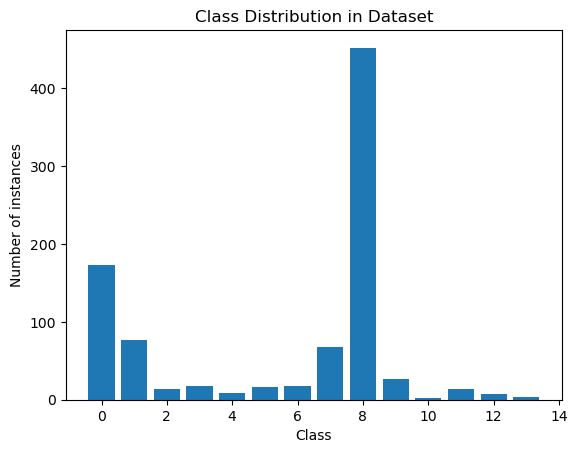

In [13]:
import torch
from collections import Counter
import matplotlib.pyplot as plt

class_counts = {8: 452, 0: 173, 1: 77, 7: 68, 9: 27, 6: 17, 3: 17, 
                5: 16, 11: 14, 2: 14, 4: 9, 12: 7, 13: 3, 10: 2}

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution in Dataset')
plt.show()

By this distrbution we can see that the data is imbalanced. We will use the `class_weight` on the cross-entropy loss to account for this. <br>
Other possibilities are: 
1. **Resampling Your Dataset**:
Oversampling the Minority Class: Increase the number of instances of underrepresented classes in your training set. This can be done by duplicating existing instances or generating synthetic instances (e.g., using SMOTE).
Undersampling the Majority Class: Reduce the number of instances of overrepresented classes.
2. **Data Augmentation**:
Apply data augmentation techniques to the minority class to create synthetic data points. This is especially useful in image and audio processing tasks.
3. **Change the Evaluation Metric**:
Use evaluation metrics like F1-score, precision-recall curve, ROC AUC, etc., which give a better sense of model performance on imbalanced datasets.

In [14]:
class_counts = {8: 452, 0: 173, 1: 77, 7: 68, 9: 27, 6: 17, 3: 17, 
                5: 16, 11: 14, 2: 14, 4: 9, 12: 7, 13: 3, 10: 2}
class_weights = 1. / torch.tensor(list(class_counts.values()), dtype=torch.float)
print('The class weights are: ', class_weights)

model = DualInputModel(model='resnet50', num_classes=14)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

The class weights are:  tensor([0.0022, 0.0058, 0.0130, 0.0147, 0.0370, 0.0588, 0.0588, 0.0625, 0.0714,
        0.0714, 0.1111, 0.1429, 0.3333, 0.5000])


## 2. **Models**



Here is a table with the models we will train:
| Model | Vision | Tabular |
| --- | --- | --- |
| 1 | - | FCN | 
| 2 | ResNet50 (CNN) | FCN | 
| 3 | ResNet50 (CNN) | - |
| 4 | DenseNet (CNN) | FCN | 
| 5 | DenseNet (CNN) | - | 
| 6 | Vision Transformer (ViT) | FCN | 
| 7 | Vision Transformer (ViT)| - | 

We use the same fully-connected network (FCN) for all models. 



### 2.1. **Fully-Connected Network (FCN)**


In [ ]:
train_loader, val_loader, test_loader = load_data(vision=None)

### 2.2. **ResNet50 (CNN)**

In [ ]:
train_loader, val_loader, test_loader = load_data(vision='resnet50')


### 2.3. **DenseNet (CNN)**

- https://github.com/liuzhuang13/DenseNet
- https://huggingface.co/docs/timm/models/densenet

In [ ]:
train_loader, val_loader, test_loader = load_data(vision='densenet121')

### 2.4. **Vision Transformer** (ViT)

- **Input**: 224x224x3 image. 
- **Preprocessing**: Split the image into 16x16 patches, flatten them into 1D vectors, and add a learnable position embedding to each patch.
- **Output**: 768-dimensional vector for each image. 

In [ ]:
train_loader, val_loader, test_loader = load_data(vision='vit')

### Wasted code

In [ ]:
num_epochs = 2

class_counts = {8: 452, 0: 173, 1: 77, 7: 68, 9: 27, 6: 17, 3: 17, 
                5: 16, 11: 14, 2: 14, 4: 9, 12: 7, 13: 3, 10: 2}
class_weights = 1. / torch.tensor(list(class_counts.values()), dtype=torch.float)
print('The class weights are: ', class_weights)

model = DualInputModel(model='densenet121', num_classes=14)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_model(model, num_epochs, train_dataloader, criterion, optimizer, device, verbose = False)
test_model(model, test_dataloader, device)
torch.save(model.state_dict(), 'model.pth')

In [ ]:
# EXAMPLE OF VIT IMAGE PROCESSING
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

In [ ]:
# PROBABLY DEPRECATED
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = train_model(model, num_epochs, train_dataloader, criterion, optimizer, device, verbose = False)
model = test_model(model, test_dataloader, device)
torch.save(model.state_dict(), 'model.pth')